In [1]:
import pandas as pd 
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# Ignore warnings
warnings.filterwarnings("ignore")

In [3]:
# read in data
df = pd.read_csv('./data/14_17_data.csv')
#Set the 'pub_date' column as the index
df.set_index('pub_date', inplace = True)
df.head()

,abstract,snippet,lead_paragraph,web_url,section_name,headline
pub_date,,,,,,
2014-01-10 02:56:53+00:00,"The trial, which was cut short, showed that In...","The trial, which was cut short, showed that In...",Shares of a small biotechnology company nearly...,https://www.nytimes.com/2014/01/10/business/pr...,Business Day,NaN
2014-01-31 16:49:26+00:00,"Motif, an investment site, tries to help small...","Motif, an investment site, tries to help small...","ARTHUR LEVITT JR., the former chairman of the ...",https://www.nytimes.com/2014/02/01/your-money/...,Your Money,{'main': 'When Buying Stock in Gluttony Is a G...
2014-02-05 02:15:23+00:00,"The compensation for Mr. Schmidt, Google’s cha...","The compensation for Mr. Schmidt, Google’s cha...",Google said on Tuesday that it gave its chair...,https://bits.blogs.nytimes.com/2014/02/04/goog...,Technology,NaN
2014-02-05 22:00:19+00:00,The microblogging company said revenue for the...,The microblogging company said revenue for the...,SAN FRANCISCO — Twitter has finally acknowledg...,https://www.nytimes.com/2014/02/06/technology/...,Technology,NaN
2014-02-10 02:03:40+00:00,Sheryl Sandberg’s nonprofit organization is pa...,Sheryl Sandberg’s nonprofit organization is pa...,"SAN FRANCISCO — There is the businesswoman, we...",https://www.nytimes.com/2014/02/10/business/le...,Business Day,NaN


In [4]:
# Drop snippet column because it is amost identical to the abstract column


In [5]:
# Initialize Vader Sentiment Intensity Analyzer
vader = SentimentIntensityAnalyzer()

In [6]:
# Create a new column called 'compound' and apply a lambda function that applies vader polarity scores to the all_text column
fab = lambda abstract: vader.polarity_scores(abstract)['compound']
df['ab_compound'] = df['abstract'].apply(fab)

flp = lambda lead_paragraph: vader.polarity_scores(lead_paragraph)['compound']
df['lp_compound'] = df['lead_paragraph'].apply(flp)
df.head(20)

,abstract,snippet,lead_paragraph,web_url,section_name,headline,ab_compound,lp_compound
pub_date,,,,,,,,
2014-01-10 02:56:53+00:00,"The trial, which was cut short, showed that In...","The trial, which was cut short, showed that In...",Shares of a small biotechnology company nearly...,https://www.nytimes.com/2014/01/10/business/pr...,Business Day,NaN,-0.2732,0.6486
2014-01-31 16:49:26+00:00,"Motif, an investment site, tries to help small...","Motif, an investment site, tries to help small...","ARTHUR LEVITT JR., the former chairman of the ...",https://www.nytimes.com/2014/02/01/your-money/...,Your Money,{'main': 'When Buying Stock in Gluttony Is a G...,0.4019,0.5574
2014-02-05 02:15:23+00:00,"The compensation for Mr. Schmidt, Google’s cha...","The compensation for Mr. Schmidt, Google’s cha...",Google said on Tuesday that it gave its chair...,https://bits.blogs.nytimes.com/2014/02/04/goog...,Technology,NaN,0.0000,0.4588
2014-02-05 22:00:19+00:00,The microblogging company said revenue for the...,The microblogging company said revenue for the...,SAN FRANCISCO — Twitter has finally acknowledg...,https://www.nytimes.com/2014/02/06/technology/...,Technology,NaN,-0.3182,-0.1027
2014-02-10 02:03:40+00:00,Sheryl Sandberg’s nonprofit organization is pa...,Sheryl Sandberg’s nonprofit organization is pa...,"SAN FRANCISCO — There is the businesswoman, we...",https://www.nytimes.com/2014/02/10/business/le...,Business Day,NaN,0.0000,0.7351
2014-02-11 22:32:52+00:00,The S.E.C. may have helped create the problem ...,The S.E.C. may have helped create the problem ...,There are now at least 58 stock exchanges in t...,https://dealbook.nytimes.com/2014/02/11/s-e-c-...,Business Day,{'main': 'S.E.C.’s Review of Stock Trading Wil...,0.4588,0.6908
2014-02-14 19:03:38+00:00,To promote the I.P.O. market and thus job grow...,To promote the I.P.O. market and thus job grow...,Call it the JOBS Act’s little brother.,https://dealbook.nytimes.com/2014/02/14/change...,Business Day,NaN,-0.1022,0.0000
2014-02-18 19:10:06+00:00,"For the first time since 1992, foreigners were...","For the first time since 1992, foreigners were...",The Treasury on Tuesday released its estimates...,https://economix.blogs.nytimes.com/2014/02/18/...,Business Day,NaN,0.0000,0.3182
2014-02-19 17:00:02+00:00,Good things keep happening to Questcor in the ...,Good things keep happening to Questcor in the ...,This is the story of a company and its fortuna...,https://dealbook.nytimes.com/2014/02/19/repeat...,Business Day,NaN,0.4404,0.4404


In [7]:
cpd_df = df.drop(columns = ['abstract', 'lead_paragraph', 'web_url', 'section_name', 'headline', 'snippet'])

In [8]:
cpd_df.head()

,ab_compound,lp_compound
pub_date,,
2014-01-10 02:56:53+00:00,-0.2732,0.6486
2014-01-31 16:49:26+00:00,0.4019,0.5574
2014-02-05 02:15:23+00:00,0.0000,0.4588
2014-02-05 22:00:19+00:00,-0.3182,-0.1027
2014-02-10 02:03:40+00:00,0.0000,0.7351


<AxesSubplot:xlabel='pub_date'>

<Figure size 864x576 with 0 Axes>

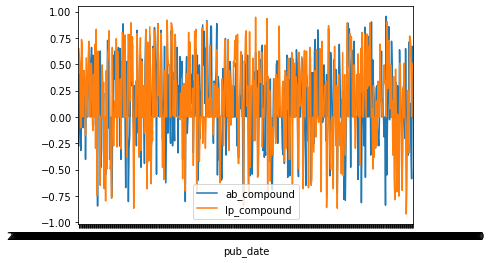

In [9]:
fig = plt.figure(figsize = (12,8))
cpd_df.plot(kind='bar')

cpd_df['ab_compound'].plot()
cpd_df['lp_compound'].plot()

<Figure size 864x576 with 0 Axes>

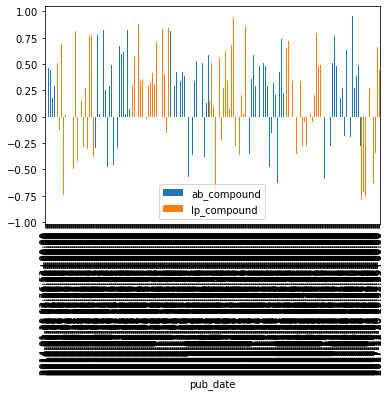

In [10]:
plt.figure(figsize=(12, 8))
cpd_df.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

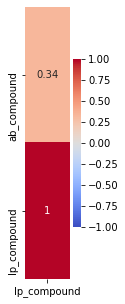

In [18]:
plt.figure(figsize = (1, 5))
sns.heatmap(cpd_df.corr()[['lp_compound']].sort_values(by ='lp_compound', key = np.abs), 
            vmin = -1, vmax = 1, cmap = 'coolwarm', annot=True);